<a href="https://colab.research.google.com/github/Anthonerp/HoangIntroToMachineLearning/blob/main/Homework2_Hoang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 15.5 Case Study: Multiple Linear Regression with the Diabetes Dataset
* Perform **multiple linear regression** using **all eight numerical features**
    * Make **more sophisticated housing price predictions** than if we were to use only a **single feature** or a **subset of the features**
* **`LinearRegression`** estimator performs **multiple linear regression** by default

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.5.1 Loading the Dataset

### Loading the Data
* Use `sklearn.datasets` function **`fetch_diabetes_housing`**
* We added `%matplotlib inline` to enable Matplotlib in this notebook.

In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()  # Bunch object

### Displaying the Dataset’s Description

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

* Confirm number of **samples/features**, number of **targets**, **feature names**

In [ ]:
diabetes.data.shape

(442, 10)

In [ ]:
diabetes.target.shape

(442,)

In [ ]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## 15.5.2 Exploring the Data with a Pandas

In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.precision', 4)  # 4 digit precision for floats

In [ ]:
# Used for command line outputs in IPython interactive mode
#pd.set_option('max_columns', 9)  # display up to 9 columns in DataFrame outputs

#pd.set_option('display.width', None)  # auto-detect the display width for wrapping

* Second statement adds a **`DataFrame` column** for **median house values**

In [ ]:
diabetes_df = pd.DataFrame(diabetes.data,
                             columns=diabetes.feature_names)

In [ ]:
diabetes_df['DiseaseProgression'] = pd.Series(diabetes.target)

## 15.5.2 Exploring the Data with a Pandas (cont.)

In [ ]:
diabetes_df.head()  # peek at first 5 rows

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


## 15.5.2 Exploring the Data with a Pandas `DataFrame` (cont.)
* Calculate **`DataFrame`’s summary statistics**

In [ ]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,-1.3815e-17,3.9184e-17,-5.7772e-18,-9.0425e-18,9.2686e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


## 15.5.3 Visualizing the Features
* Helpful to **visualize** data by **plotting the target value** against **each** feature
    Shows how **disease progression** relates to **each feature**

In [ ]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

* Display **scatter plots** of several **features**
* Each shows **feature** on **x-axis** and **median home value** on **y-axis**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
# sns.set(font_scale=2)

In [ ]:
sns.set_style('whitegrid')

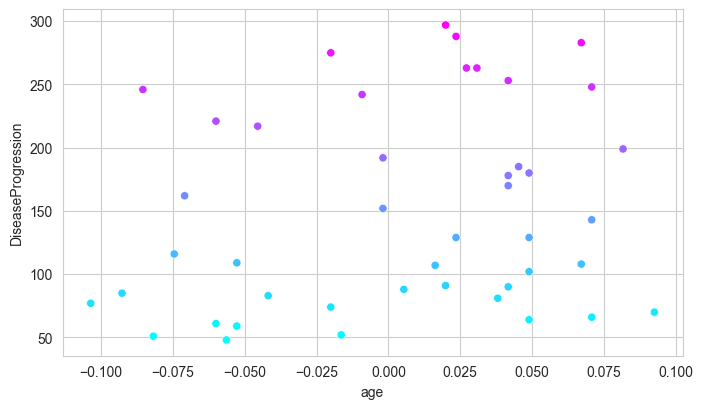

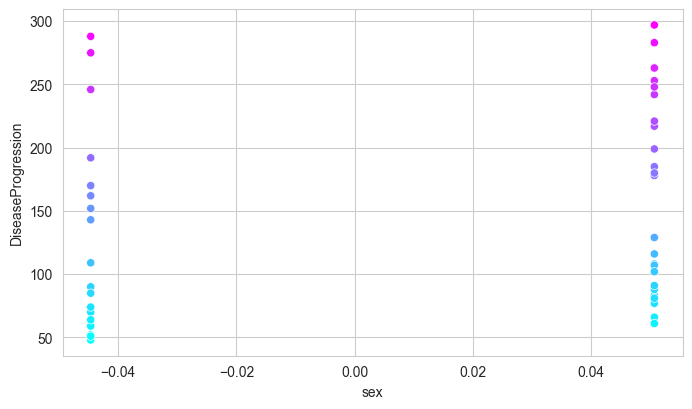

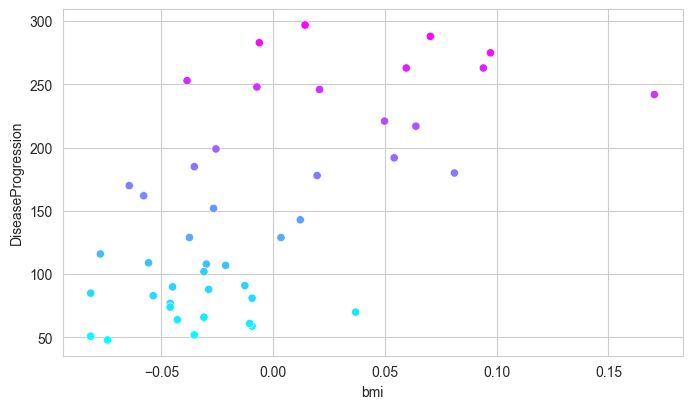

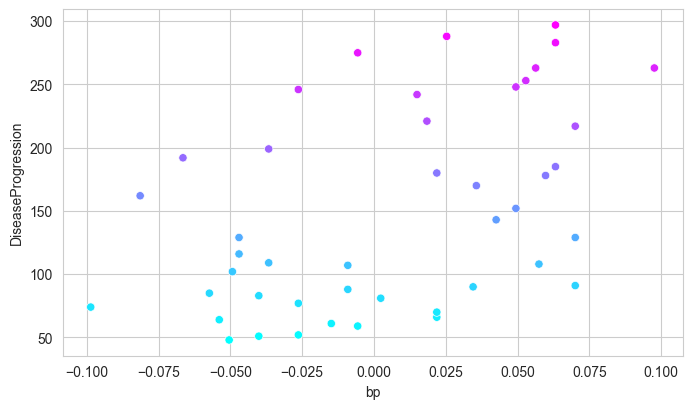

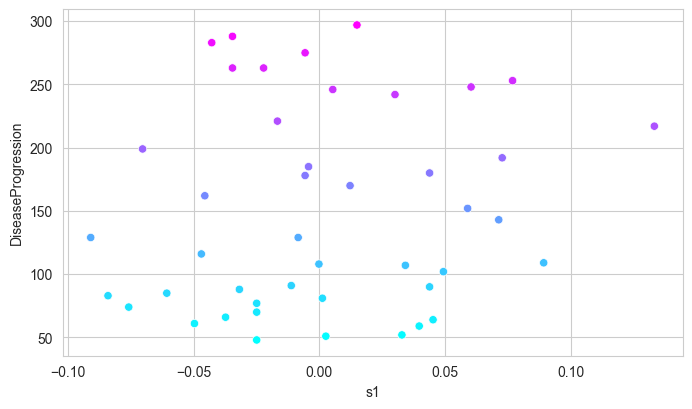

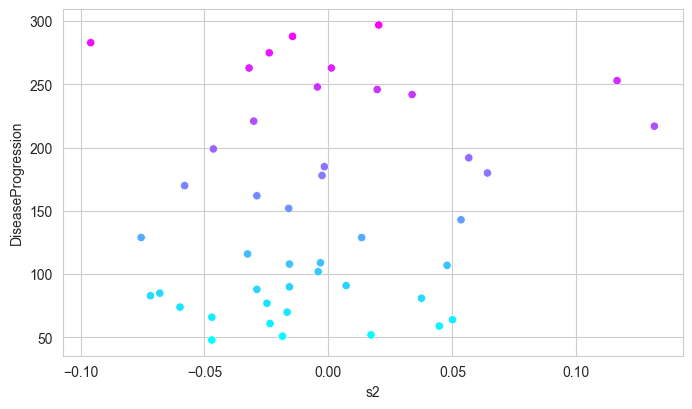

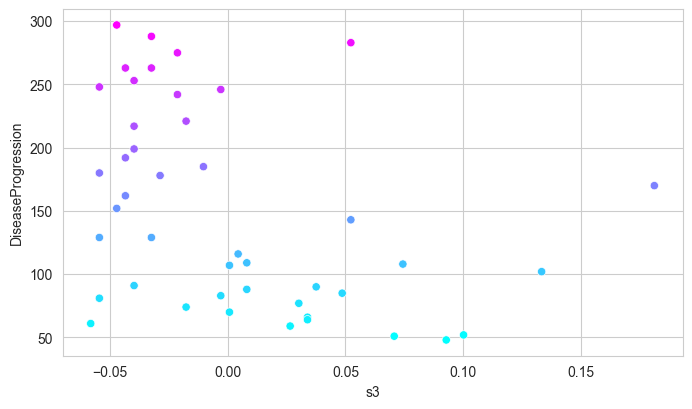

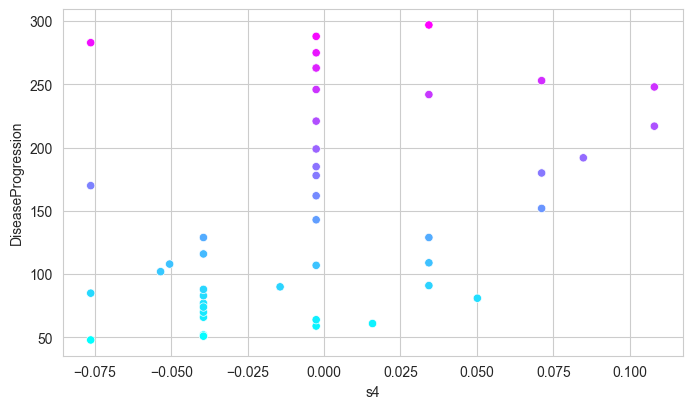

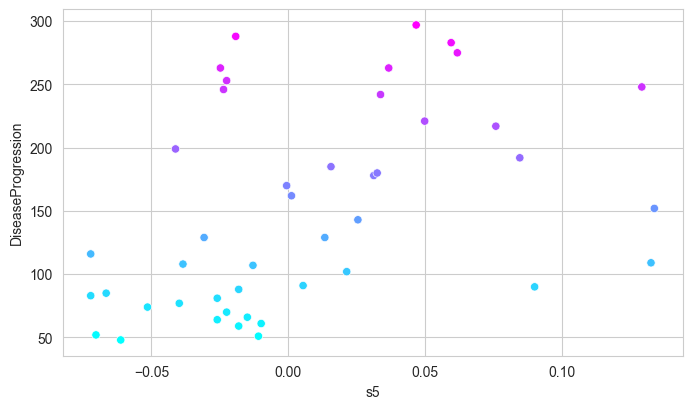

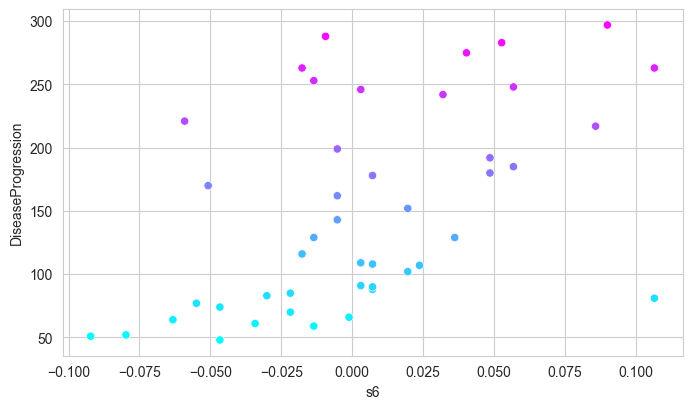

In [ ]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))  # 8"-by-4.5" Figure
    sns.scatterplot(data=sample_df, x=feature,
                    y='DiseaseProgression', hue='DiseaseProgression',
                    palette='cool', legend=False)

<!-- ![diabetes Housing Dataset scatterplot of Median House Value vs. Median Income](./ch14images/medincome.png "diabetes Housing Dataset scatterplot of Median House Value vs. Median Income")
 ![diabetes Housing Dataset scatterplot of Median House Value vs. House Age](./ch14images/houseage.png "diabetes Housing Dataset scatterplot of Median House Value vs. House Age")
 ![diabetes Housing Dataset scatterplot of Median House Value vs. Average Rooms](./ch14images/averooms.png "diabetes Housing Dataset scatterplot of Median House Value vs. Average Rooms")
 ![diabetes Housing Dataset scatterplot of Median House Value vs. Average Bedrooms](./ch14images/avebedrooms.png "diabetes Housing Dataset scatterplot of Median House Value vs. Average Bedrooms")
 ![diabetes Housing Dataset scatterplot of Median House Value vs. Population](./ch14images/population.png "diabetes Housing Dataset scatterplot of Median House Value vs. Population")
 ![diabetes Housing Dataset scatterplot of Median House Value vs. Average Occupancy](./ch14images/aveoccupancy.png "diabetes Housing Dataset scatterplot of Median House Value vs. Average Occupancy")
 ![diabetes Housing Dataset scatterplot of Median House Value vs. Lattitude](./ch14images/lattitude.png "diabetes Housing Dataset scatterplot of Median House Value vs. Lattitude")
 ![diabetes Housing Dataset scatterplot of Median House Value vs. Longitude](./ch14images/longitude.png "diabetes Housing Dataset scatterplot of Median House Value vs. Longitude")<hr style="height:2px; border:none; color:black; background-color:black;"> -->

## 15.5.4 Splitting the Data for Training and Testing Using `train_test_split`  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [ ]:
X_train.shape

(331, 10)

In [ ]:
X_test.shape

(111, 10)

## 15.5.5 Training the Model
* **`LinearRegression`** tries to use **all** features in a dataset’s `data` array
    * **error** if any features are **categorical**  
    * Categorical data must be preprocessed into numerical data or excluded
* **Scikit-learn’s bundled datasets** are already in the **correct format** for training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regression = LinearRegression()

In [ ]:
linear_regression.fit(X=X_train, y=y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 15.5.5 Training the Model (cont.)
* **Separate coefficients** for each feature (stored in `coeff_`) and **one intercept** (stored in `intercept_`)
    * **Positive coefficients** &mdash; median house value **increases** as feature value **increases**
    * **Negative coefficients** &mdash; median house value **decreases** as feature value **increases**
    * **HouseAge**, **AveOccup** and **Population** are **close to zero**, so these apparently have little to no affect on **median house value**

In [ ]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.219814056772215
       sex: -266.4570523220359
       bmi: 523.0634112596988
        bp: 310.51346996700465
        s1: -336.16147381069425
        s2: 137.33929238424494
        s3: -131.13923283453735
        s4: -1.1492348017320815
        s5: 622.3286855688125
        s6: 60.46645769168259


In [ ]:
linear_regression.intercept_

np.float64(152.22822762230342)

## 15.5.5 Training the Model (cont.)
* Can use coefficient values in following equation to **make predictions**:

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}

* <em>m</em><sub>1</sub>, <em>m</em><sub>2</sub>, …, <em>m</em><sub><em>n</em></sub> are the **feature coefficients**
* <em>b</em> is the **intercept**
* <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub>, …, <em>x</em><sub><em>n</em></sub> are **feature values** (the **independent variables**)
* <em>y</em> is the **predicted value** (the **dependent variable**)
   

## 15.5.6 Testing the Model
* Use the estimator’s `predict` method

In [ ]:
predicted = linear_regression.predict(X_test)

In [ ]:
expected = y_test

In [ ]:
predicted[:5]  # first 5 predictions

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [ ]:
expected[:5]   # first five targets

array([ 79.,  55., 109., 178.,  39.])

## 15.5.6 Testing the Model with the Estimator’s `predict `Method (cont.)
* In **classification**, **predictions** were **distinct classes** that **matched existing classes** in the dataset
* In **regression**, it’s **tough to get exact predictions**, because you have **continuous outputs**
    * Every possible value of <em>x</em><sub>1</sub>, <em>x</em><sub>2</sub> … <em>x</em><sub><em>n</em></sub> in the following calculation predicts a value

\begin{equation}
y = m_1 x_1 + m_2 x_2 + ... + m_n x_n + b
\end{equation}


## 15.5.7 Visualizing the Expected vs. Predicted Prices
* Create a `DataFrame` containing columns for the expected and predicted values:

In [ ]:
df = pd.DataFrame()

In [ ]:
df['Expected'] = pd.Series(expected)

In [ ]:
df['Predicted'] = pd.Series(predicted)

## 15.5.7 Visualizing the Expected vs. Predicted Prices (cont.)
* Plot the data as a scatter plot with the **expected (target) prices** along the x-axis and the **predicted prices** along the **y**-axis:

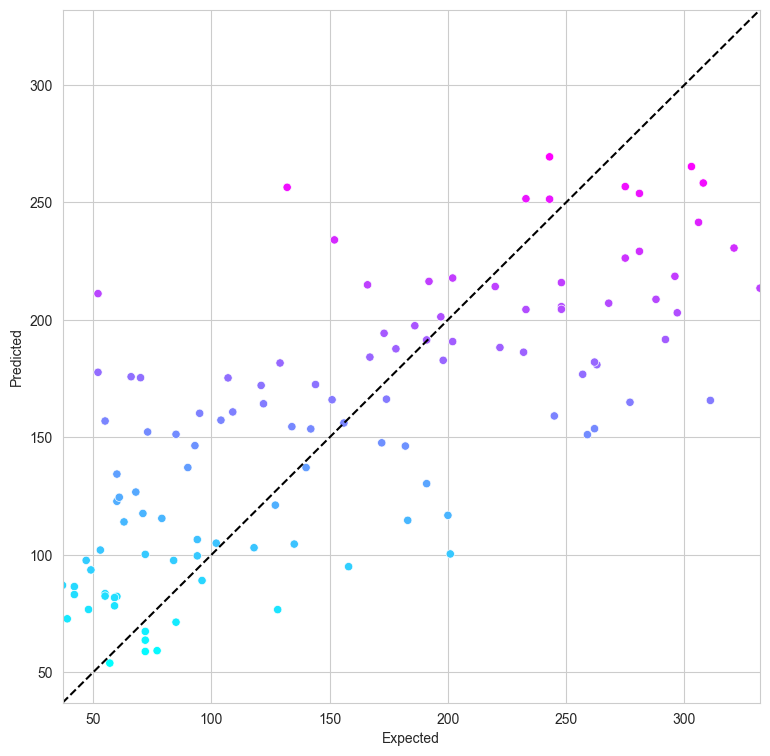

In [ ]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

## 15.5.7 Visualizing the Expected vs. Predicted Prices (cont.)
* Set the **<em>x</em>**- and **<em>y</em>**-axes’ limits to use the same scale along both axes:
* Plot a line that represents **perfect predictions** (this is **not** a regression line).
    * The call to **`plot`** displays a line between the points representing the lower-left corner of the graph (`start, start`) and the upper-right corner of the graph (`end, end`).
    * The third argument (`'k--'`) indicates the line’s style.
    * The letter `k` represents the color black, and the `--` indicates that plot should draw a dashed line:
* If every predicted value were to match the expected value, then all the dots would be plotted along the dashed line.
* Appears that as the expected median house value increases, more of the predicted values fall below the line.
* So the model **seems to predict** lower median house values as the **expected** median house value increases.


## 15.5.8 Regression Model Metrics
* **Metrics for regression estimators** include **coefficient of determination** (**$R^{2}$ score**; 0.0-1.0)
    * **1.0** &mdash; estimator **perfectly predicts** the **dependent variable’s value**, given independent variables' values
    * **0.0** &mdash; **model cannot make predictions with any accuracy**, given independent variables’ values
* Calculate with arrays representing the **expected** and **predicted results**

In [ ]:
from sklearn import metrics

In [ ]:
metrics.r2_score(expected, predicted)

0.5322429620529407

## 15.5.9 Choosing the Best Model
* **Try several estimators** to determine whether any **produces better results** than `LinearRegression`
* [Information about estimators used here](https://scikit-learn.org/stable/modules/linear_model.html)

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [ ]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

## 15.5.9 Choosing the Best Model (cont.)
* Run the estimators using **k-fold cross-validation**
* **`cross_val_score` argument `scoring='r2'`** &mdash; report **$R^{2}$ scores** for **each fold**
    * **1.0 is best**, so **`LinearRegression`** and **`Ridge`** appear to be **best models** for this dataset

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
